## Normalizacja danych
### Czym jest norma?
Jest to funkcja spełniająca określone właściwości dotyczące skalowalności i addytywności oraz przypisująca ściśle dodatnią liczbę rzeczywistą każdemu wektorowi w zdefiniowanej przestrzeni wektorowej. Szczególnym przypadkiem jest wektor zerowy, któremu jest przypisana wartość $0$.

W najprostszych słowach **norma** to długość wektora w danej przestrzeni.

W jednowymiarowej przestrzeni $||x||_1=||x||_2=\cdots=||x||_p=|x|$

Przykłady norm dla wektora $x \in \mathbb{R}^3, x = (x_1,x_2,x_3)$:
- $||x||_1 = |x_1|^1+|x_2|^1+|x_3|^1$
- $||x||_2 = (|x_1|^2+|x_2|^2+|x_2|^2)^{\frac{1}{2}} = \sqrt{(x_1^2+x_2^2+x_2^2)}$
- ...
- $||x||_p = |x_1|^{\frac{1}{p}}+|x_2|^{\frac{1}{p}}+|x_2|^{\frac{1}{p}}$
- $||x||_\infty = \max(|x_1|,|x_2|,|x_3|)$

### Czym jest normowanie wektorów?

In [1]:
import numpy as np
import matplotlib.pyplot as plt

V = np.array([[1,1],[-2,2],[4,-3]])
origin = [0], [0] # origin point

plt.quiver(*origin, V[:,0], V[:,1], scale=10)
plt.show()

<Figure size 640x480 with 1 Axes>

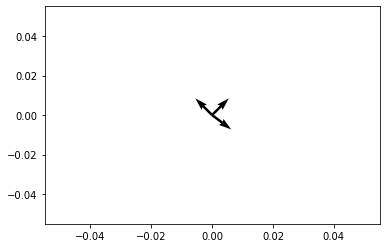

In [2]:
from sklearn import preprocessing
V_normed = preprocessing.normalize(V, norm = 'l1', axis = 1)

plt.quiver(*origin, V_normed[:,0], V_normed[:,1], scale=10)
plt.show()

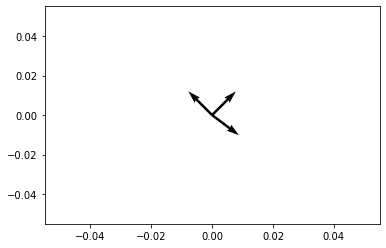

In [4]:
from sklearn import preprocessing
V_normed = preprocessing.normalize(V, norm = 'l2',axis=1)

plt.quiver(*origin, V_normed[:,0], V_normed[:,1], scale=10)
plt.show()

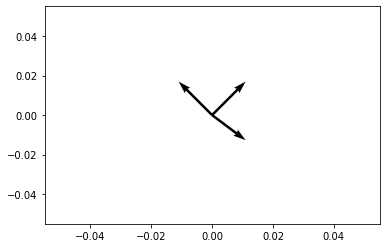

In [5]:
from sklearn import preprocessing
V_normed = preprocessing.normalize(V, norm = 'max',axis = 1)

plt.quiver(*origin, V_normed[:,0], V_normed[:,1], scale=10)
plt.show()

### Przykład dla danych tabularycznych

In [30]:
import numpy as np
x = np.array([[2,2,3,10],[2,2,3,20],[2,2,3,30]])
x

array([[ 2,  2,  3, 10],
       [ 2,  2,  3, 20],
       [ 2,  2,  3, 30]])

In [31]:
l1_norm = preprocessing.normalize(x, norm = 'l1',axis = 1)
l1_norm

array([[0.11764706, 0.11764706, 0.17647059, 0.58823529],
       [0.07407407, 0.07407407, 0.11111111, 0.74074074],
       [0.05405405, 0.05405405, 0.08108108, 0.81081081]])

In [32]:
l1_norm.sum(axis=1)

array([1., 1., 1.])

In [33]:
l2_norm = preprocessing.normalize(x, norm = 'l2',axis = 1)
l2_norm

array([[0.18490007, 0.18490007, 0.2773501 , 0.92450033],
       [0.09794042, 0.09794042, 0.14691063, 0.97940421],
       [0.06604582, 0.06604582, 0.09906873, 0.99068728]])

In [34]:
l2_norm.sum(axis=1)

array([1.57165056, 1.32219569, 1.22184765])

In [35]:
max_norm = preprocessing.normalize(x, norm = 'max',axis = 1)
max_norm

array([[0.2       , 0.2       , 0.3       , 1.        ],
       [0.1       , 0.1       , 0.15      , 1.        ],
       [0.06666667, 0.06666667, 0.1       , 1.        ]])

In [36]:
max_norm.sum(axis=1)

array([1.7       , 1.35      , 1.23333333])

- Przetestujmy sobie normowanie per kolumna

- Przetestujmy wygodne sklearnowe API

### Krótkie uzupełnienie - najprostszy normalizer - MinMaxScaler
$x_{scaled} = \frac{x-min(x)}{max(x)-min(x)}$

Ten mechanizm działa lepiej w przypadkach, w których StandardScaler (poprzednie zajęcia) może nie działać tak dobrze. Jeśli rozkład danych nie jest normalny lub odchylenie standardowe jest bardzo małe, wtedy należy wykorzystać MinMaxScaler.

In [48]:
x = np.array([[-1, 2], [-0.5, 6], [0, 10], [1, 18]])
x

array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

In [49]:
x_std = (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0))

In [50]:
x_std

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

- Przetestujmy wygodne sklearnowe API

### Po co wykonujemy normalizacje? 
### Jakie zmienia się nasz wektor i jakie wartości może przyjąć?
### Czym różni się normalizacja od standaryzacji?
Standaryzacja zmiennej x dla przypomnienia: $z = \frac{(x - mean(x))}{std(x)}$

## Klasyfikacja 
Klasyfikacja to rodzaj algorytmu statystycznego, który przydziela obserwacje statystyczne do klas, bazując na atrybutach tych obserwacji.

**Definicja:**
Dla danego zbioru danych trenujących $\{(x_1,y),\ldots,(x_n,y)\}$ algorytm potrafi znaleźć funkcję klasyfikującją $h: X -> Y$, która przydziela obiektowi $x\in X$ klasę $y \in Y$.

- prawdopodobieństwo aposteriori: $P(Y=i|X)$
- funkcja klasyfikacyjna przyjmuje postać: $h(X) = argmax_{1,\ldots,y} P(Y=i|X)$

Przykłady klasyfikacji:
- wykrywanie czy pacjent jest chory na daną chorobę na podstawie wyników badań
- klasyfikacja maili jako spam/nie-spam
- czy transakcja dokonana na koncie klienta banku to oszustwo/kradzież czy też normalna transakcja
- rozpoznawania na obrazu różnych rodzajów zwierząt
- rozpoznawanie czy pasażer przeżyje katastrofę na titanicu

Na potrzeby uproszczenia wyjaśniania w dalszej części labów, skupimy się tylko na klasyfikacji binarnej!

Zajmiemy się zbiorem gdzie klasyfikujemy u pacjentów czy występuje choroba serca czy nie.

In [72]:
import pandas as pd
np.random.seed = 42

In [73]:
data = pd.read_csv('heart.csv')
data.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [74]:
# Szybko sprawdzamy podstatowe cechy danych
na_ratio_cols = data.isna().mean(axis=0)
na_ratio_cols

sbp          0.0
tobacco      0.0
ldl          0.0
adiposity    0.0
famhist      0.0
typea        0.0
obesity      0.0
alcohol      0.0
age          0.0
chd          0.0
dtype: float64

In [75]:
y = np.array(data['chd'])
X = data.drop(['chd'],axis=1)

In [76]:
y

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,

In [77]:
X.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49


#### Szybkie ćwiczenie - wykonaj dowolne kodowanie zmiennej kategorycznej

In [82]:
map_dict = {'Present': 1, 'Absent':0}
X['famhist'] = X['famhist'].map(map_dict)
X.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49


### Jaki znacie najprostszy klasyfikator?

In [83]:
from sklearn.dummy import DummyClassifier

In [84]:
dc = DummyClassifier(strategy='uniform', random_state=42)
dc.fit(X,y)
y_proba = dc.predict_proba(X)
y_hat = dc.predict(X)
print("proba: " + str(y_proba[0:10,0]) + '\ny:     ' + str(y_hat[0:10]) + '\ny_hat: ' + str(y[0:10]))

proba: [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
y:     [0 1 0 0 0 1 0 0 0 1]
y_hat: [1 1 0 1 1 0 0 1 0 1]


- Jakieś inne proste klasyfikatory?

## Regresja logistyczna - czemu by nie prognozować prawdopodobieństwa za pomocą regresji liniowej?

**Przypomnienie:** uogólniony model liniowy: $y_{i}=\beta _{0}1+\beta _{1}x_{i1}+\cdots +\beta _{p}x_{ip} = x^T \beta$

- Jaki jest podstawowy problem z wykorzystaniem regresji do modelowania prawdopodobieństwa?
- Jakie macie propozycje rozwiązania tego problemu?

$odds = \frac{P(Y=1|X)}{P(Y=0|X)} = \frac{p}{1-p}$ $\in (0,1)$

$\log({odds}) \in (-\infty, \infty)$

Co pozwala nam modelować powyższe równanie dzięki regresji liniowej, po przekształceniu równania, uzyskujemy prawdopodobieństwo sukcesu:

$x^T \beta = \log({\frac{p}{1-p}}) \Rightarrow p = \frac{1}{1+\exp({-x^T \beta})}$

In [85]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)

lr.fit(X,y)
y_hat = lr.predict(X)
print('y:     ' + str(y_hat[0:10]) + '\ny_hat: ' + str(y[0:10]))

y:     [1 0 0 1 1 1 0 1 0 1]
y_hat: [1 1 0 1 1 0 0 1 0 1]


- Jakie są zalety regresji logistycznej?

## Drzewo decyzyjne
- Jak wykorzystać model drzewa do predykcji klasyfikacji/regresji?
- jakie problemy może to generować?

In [91]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

tree.fit(X,y)
y_hat = tree.predict(X)
print('y:     ' + str(y_hat[0:10]) + '\ny_hat: ' + str(y[0:10]))

y:     [1 1 0 1 1 0 0 1 0 1]
y_hat: [1 1 0 1 1 0 0 1 0 1]


## SVM
Znalezienie równania hiperpłaszczyzny, która najlepiej dzieli nasz zbiór danych na klasy
- Co jeżeli nie istnieje taka płaszczyzna?
- Co jeżeli nasze dane nie są separowalne liniowo, tylko np. radialnie?

In [102]:
from sklearn.svm import SVC
svm = SVC()

svm.fit(X,y)
y_hat = svm.predict(X)
print('y:     ' + str(y_hat[0:10]) + '\ny_hat: ' + str(y[0:10]))

y:     [0 0 0 0 0 0 0 0 0 0]
y_hat: [1 1 0 1 1 0 0 1 0 1]


- Jakie widzicie wady/zalety tego algorytmu?

## Naiwny Klasyfikator Bayesowski
Jest oparty na założeniu o wzajemnej niezależności zmiennych. Często nie mają one żadnego związku z rzeczywistością i właśnie z tego powodu nazywa się je naiwnymi.

In [109]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X,y)
y_hat = nb.predict(X)
print('y:     ' + str(y_hat[0:10]) + '\ny_hat: ' + str(y[0:10]))

y:     [1 0 0 1 1 1 0 0 0 1]
y_hat: [1 1 0 1 1 0 0 1 0 1]


- Jakie widzicie wady/zalety tego algorytmu?

## Sposoby podziału danych
- Jak radzić sobie z overfitingiem?
- Jakie znacie sposoby podziału danych na treningowe i testowe?

### Zbiór treningowy i testowy
Prosty podział danych na część, na której uczymy model i na część która służy nam do sprawdzenia jego skuteczności.

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
print(X.shape,X_train.shape,X_test.shape)

(462, 9) (369, 9) (93, 9)


**Szybkie zadanie:** Podzielić dane w taki sposób jak powyżej i nauczyć na zbiorze treningowym regresje logistyczną

- Jakie widzicie wady podejścia train/test split?

### Crossvalidation
- Czy możemy stosować CV dzieląc zbiór, tak by w zbiorze walidacyjnym pozostała tylko jedna obserwacja danych?
- Czy sprawdzając performance modelu przez CV, możemy potem nauczyć model na całym zbiorze danych?
- Czy dobierając parametry do modelu, powinniśmy wydzielić dodatkowy zbiór testowy, a CV przeprowadzać tylko na części treningowej?

In [116]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr, X, y, scoring='accuracy', cv = 10)

array([0.78723404, 0.68085106, 0.73913043, 0.67391304, 0.58695652,
       0.76086957, 0.76086957, 0.65217391, 0.7826087 , 0.7826087 ])

## Miary ocen jakości klasyfikatorów
- Jakie znacie miary oceny klasyfikatorów?

Na potrzeby zadania wygenerujmy sobie wynik:

In [100]:
lr.fit(X_train,y_train)
y_hat = lr.predict(X_test)
print("y_test: "+ str(y_test) + "\n\ny_hat:  " + str(y_hat))

y_test: [0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0
 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0]

y_hat:  [0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0
 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0]


### Accuracy
$ACC = \frac{TP+TN}{ALL}$

Bardzo intuicyjna miara - ile obserwacji zakwalifikowaliśmy poprawnie.

- Jaki jest problem z accuracy?

In [101]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_hat)

0.7634408602150538

### Precision & Recall
**Precision** mówi o tym jak dokładny jest model wśród pozytywnej klasy, ile z przewidzianych jest faktycznie pozytywnych.

$PREC = \frac{TP}{TP+FP}= \frac{TP}{\text{TOTAL PREDICTED POSITIVE}}$

- Jakie widzicie zastosowania takiej miary?


$RECALL = \frac{TP}{TP+FN} = \frac{TP}{\text{TOTAL ACTUAL POSITIVE}}$
- Jakie widzicie zastosowania takiej miary?


In [103]:
from sklearn.metrics import precision_score
precision_score(y_test, y_hat)

from sklearn.metrics import recall_score
recall_score(y_test, y_hat)

0.5588235294117647

### F1 Score
Szukanie balansu pomiędzy PRECISION i RECALL:

$F1 = 2\frac{PREC * RECALL}{PREC + RECALL}$

In [104]:
from sklearn.metrics import f1_score
f1_score(y_test, y_hat)

0.6333333333333334

### ROC AUC
Receiver Operating Characterictic (ROC), lub po prostu krzywa ROC, to wykres, który ilustruje efektywność binarnego klasyfikatora, niezależnie od progu dyskryminacyjnego. Na osi Y jest TPR, czyli RECALL, na osi X jest FPR, czyli $1 - SPECIFITY$.

$FPR = 1- SPECIFITY = 1 - \frac{TN}{TN+FP}$

SPECIFITY - przykład: odsetek zdrowych osób, które są prawidłowo zidentyfikowane jako nie cierpiące na chorobę.

In [126]:
y_hat_proba = lr.predict_proba(X_test)[:,1]

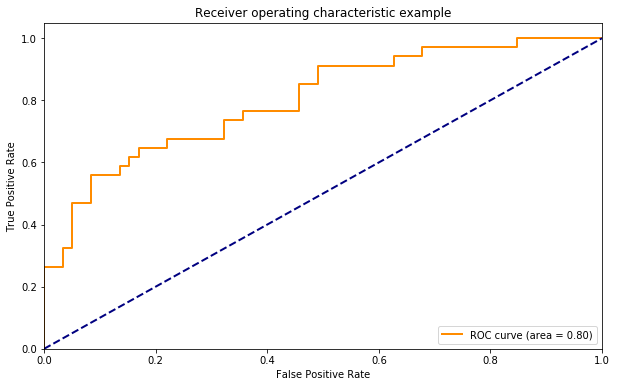

In [127]:
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(y_test, y_hat_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

- Jaką widzicie przewagę tej miary nad poprzednimi?

In [143]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_hat_proba)

0.801096709870389

**Zadanie** - przetestować 3 modele przedstawione dziś na zajęciach i sprawdzić, który jest lepszy na podstawie wyżej wymienionych miar.